In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # for plotting facilities

In [2]:
df = pd.read_csv('Wholesale customers data.csv')
df.shape

(440, 8)

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


* We can see that Channel variable contains values as 1 and 2.

* These two values classify the customers from two different channels as

1 for Horeca (Hotel/Retail/Café) customers and
2 for Retail channel (nominal) customers.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


We can see that there are only numerical variables in the dataset.

### Summary statistics of dataset

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Check for missing values 

In [6]:
missing_value = df.isnull().sum()
missing_value

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

We can see that there are no missing values in the dataset.

###  Declare feature vector and target variable 

In [7]:
X = df.drop('Channel', axis = 1)
y = df['Channel']

* Now, let's take a look at feature vector(X) and target variable(y).

In [8]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [9]:
y.head()

0    2
1    2
2    2
3    1
4    2
Name: Channel, dtype: int64

* We can see that the y label contain values as 1 and 2.

* We will need to convert it into 0 and 1 for further analysis.

* We will do it as follows -

In [10]:
# convert labels into binary values
y[y == 2] = 0

y[y == 1] = 1 

In [11]:
# again preview the y label

y.head()


0    0
1    0
2    0
3    1
4    0
Name: Channel, dtype: int64

* Now, we will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [12]:
import xgboost as xgb

# define data_dmatrix
data_dmatrix = xgb.DMatrix(data = X, label = y)

### Split data into separate training and test set 

In [13]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 0
)

In [14]:
# import XGBClassifier
from xgboost import XGBClassifier

# declare parameters
params = {
    'objective' : 'binary:logistic',
    'max_depth' : 4,
    'alpha' : 10,
    'learning_rate' : 1.0,
    'n_estimators' : 100
}

# instantiate the classifier 
xgb_clf = XGBClassifier(**params)

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

[13:19:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/newuser/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
# we can view the parameters of the xgb trained model as follows -

print(xgb_clf)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.0, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


### Make predictions with XGBoost Classifier

In [16]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

### Check accuracy score 

In [17]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

XGBoost model accuracy score: 0.9205


We can see that XGBoost obtain very high accuracy score of 92.05%.

### k-fold Cross Validation using XGBoost 

* To build more robust models with XGBoost, we should always perform k-fold cross validation.


* In this way, we ensure that the original training dataset is used for both training and validation.

* Also, each entry is used for validation just once.


* XGBoost supports k-fold cross validation using the cv() method.
* In this method, we will specify several parameters which are as follows:-


*   **nfolds** - This parameter specifies the number of cross-validation sets we want to build.
*   **num_boost_round** - It denotes the number of trees we build.
*   **metrics** - It is the performance evaluation metrics to be considered during CV.
*   **as_pandas** - It is used to return the results in a pandas DataFrame.
*   **early_stopping_rounds** - This parameter stops training of the model early if the hold-out metric does not improve for a given number of rounds.
*  **seed** - This parameter is used for reproducibility of results.

We can use these parameters to build a k-fold cross-validation model by calling XGBoost's CV() method.

In [18]:
from xgboost import cv

params = {
    'objective' : 'binary:logistic',
    'colsample_bytree' : 0.3,
    'learning_rate' : 0.1,
    'max_depth' : 5,
    'alpha' : 10
}

xgb_cv = cv(dtrain = data_dmatrix,
            params = params, 
            nfold = 3,
            num_boost_round = 50, 
            early_stopping_rounds = 10,
            metrics = "auc",
            as_pandas = True,
            seed=123)

* **xgb_cv** contains train and test auc metrics for each boosting round.

* Let's preview **xgb_cv**

In [19]:
xgb_cv.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.917860,0.006809,0.888360,0.037170
1,0.920484,0.011244,0.886998,0.037300
2,0.931564,0.003005,0.882138,0.041967
3,0.943088,0.017875,0.891426,0.053799
4,0.940179,0.024116,0.885100,0.055394


### Feature importance with XGBoost 

* XGBoost provides a way to examine the importance of each feature in the original dataset within the model.
* It involves counting the number of times each feature is split on across all boosting trees in the model.

* Then we visualize the result as a bar graph, with the features ordered according to how many times they appear.
* XGBoost has a **plot_importance()** function that helps us to achieve this task.
* Then we can visualize the features that has been given the highest important score among all the features.
* Thus XGBoost provides us a way to do feature selection.
* We will proceed as follows:-

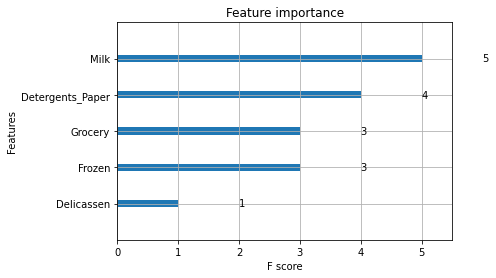

<Figure size 1152x864 with 0 Axes>

In [20]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

* Based upon this importance score, we can select the features with highest importance score and discard the redundant ones.
* Thus XGBoost also gives us a way to do feature selection.